In [1]:
! pip install -U backtrader

Requirement already up-to-date: backtrader in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (1.9.74.123)


In [1]:
# Strategy

from datetime import datetime
import backtrader


def Function_For_Build_SmaCross_Strategy_Object(short_sma, long_sma):

    class SmaCross_StrategyObject(backtrader.SignalStrategy):
        def __init__(self):
            sma1, sma2 = backtrader.ind.SMA(period=short_sma), backtrader.ind.SMA(period=long_sma)
            crossover = backtrader.ind.CrossOver(sma1, sma2)
            self.signal_add(backtrader.SIGNAL_LONG, crossover)
               
    return SmaCross_StrategyObject

In [2]:
# Integrate Model

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot
import warnings
warnings.filterwarnings('ignore')

class Trading_Picture_Generator:


    # General
    Trading_Object_Name = ""
    Trading_Level_Multiplier = 1000
    
    Trading_DateTime_Start = datetime(2018,1,1)
    Trading_DateTime_End = datetime(2019,9,22)

    I_Am_Trading_Cerebro_Object = backtrader.Cerebro()

    # Parameter for Moving Average
    Short_MovingAverage = 10 
    Long_MovingAverage = 20


    def __init__(
        self, 
        Trading_Object_Name_Input, 
        Trading_Level_Multiplier_Input, 
        Trading_DateTime_Start_Input, 
        Trading_DateTime_End_Input):

        self.Trading_Object_Name = Trading_Object_Name_Input
        self.Trading_Level_Multiplier = Trading_Level_Multiplier_Input

        self.Trading_DateTime_Start = Trading_DateTime_Start_Input
        self.Trading_DateTime_End = Trading_DateTime_End_Input



####################################################################################
    # Functions For Moving Average 
####################################################################################    
    def Function_RunTrading_MovingAverage(self, Short_MovingAverage_Input, Long_MovingAverage_Input): 

        Cerebro_Object = backtrader.Cerebro()
        Cerebro_Object.broker.setcommission(mult=self.Trading_Level_Multiplier)
        SmaCross_StrategyObject = Function_For_Build_SmaCross_Strategy_Object(Short_MovingAverage_Input, Long_MovingAverage_Input)
        Cerebro_Object.addstrategy(SmaCross_StrategyObject)

        Im_Data = backtrader.feeds.YahooFinanceData(
            dataname = self.Trading_Object_Name , 
            fromdate=self.Trading_DateTime_Start, 
            todate=self.Trading_DateTime_End)    

        Cerebro_Object.adddata(Im_Data)
        Cerebro_Object.broker.setcash(10000.0)
        Cerebro_Object.run()
        
        self.Short_MovingAverage = Short_MovingAverage_Input
        self.Long_MovingAverage = Long_MovingAverage_Input
        self.Trading_Cerebro_Object = Cerebro_Object



    def Function_Batch_MovingAverage(self, Trading_Object_Name_List, Trading_Level_Multiplier_List, Short_MovingAverage_Interval, Long_MovingAverage_Interval):


        try:

            for Specific_Trading_Object_Counter in range(len(Trading_Object_Name_List)):
                for I_Am_Long_MovingAverage in range(Long_MovingAverage_Interval[0],Long_MovingAverage_Interval[1]):
                    for I_Am_Short_MovingAverage in range(Short_MovingAverage_Interval[0] ,Short_MovingAverage_Interval[1]):

                        self.Trading_Object_Name = Trading_Object_Name_List[Specific_Trading_Object_Counter]
                        self.Trading_Level_Multiplier = Trading_Level_Multiplier_List[Specific_Trading_Object_Counter]
                        self.Function_RunTrading_MovingAverage(I_Am_Short_MovingAverage , I_Am_Long_MovingAverage)
                        self.Function_Plotting_MA()
        except:
            
            print(sys.exc_info())


    def Function_Plotting_MA(self) : 

    #    cerebro.plot()
        figure = matplotlib.pyplot.figure(figsize=(24.0, 15.0))
        figure = self.Trading_Cerebro_Object.plot()[0][0]
        figure.savefig('Trading_Plot/MA/TradingMA_Object[{}]_Position[{}%]_Multiplier[{}]_Short[{}]Long[{}].jpg'.format(
            self.Trading_Object_Name,
            self.Trading_Cerebro_Object.broker.getvalue()/100,
            self.Trading_Level_Multiplier, 
            self.Short_MovingAverage, 
            self.Long_MovingAverage))
        matplotlib.pyplot.close(figure)
        matplotlib.pyplot.close("all")


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
# Build Instance and draw single plot
%matplotlib inline

<Figure size 1728x1080 with 0 Axes>

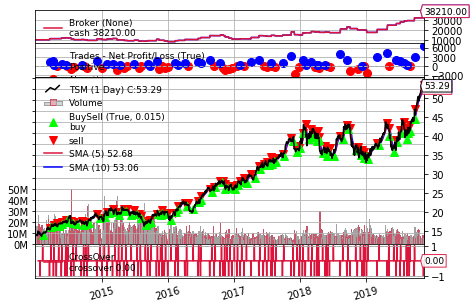

In [4]:
# MA
I_Am_Trading_Instance = Trading_Picture_Generator("TSM", 1000, datetime(2014,1,1), datetime(2019,11,16))
I_Am_Trading_Instance.Function_RunTrading_MovingAverage(5 , 10)
I_Am_Trading_Instance.Function_Plotting_MA()

In [ ]:
## Taiwan Market ##
#TSMC  #MSCI  #T50
I_Am_Trading_Instance.Function_Batch_MovingAverage(
    Trading_Object_Name_List = ["TSM","EWT", "0050.TW"], 
    Trading_Level_Multiplier_List = [1000,500,1000],
    Short_MovingAverage_Interval = [5,10], 
    Long_MovingAverage_Interval = [20,30])

In [ ]:
## US Index ##
#SP500  #DOW  #NASDAQ
I_Am_Trading_Instance.Function_Batch_MovingAverage(["^GSPC", "^DJI","^IXIC"], [500,1000,500],[5,10], [20,30])

<Figure size 1728x1080 with 0 Axes>

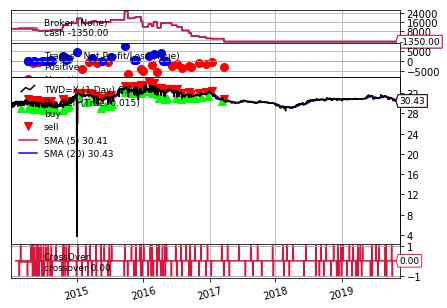

<Figure size 1728x1080 with 0 Axes>

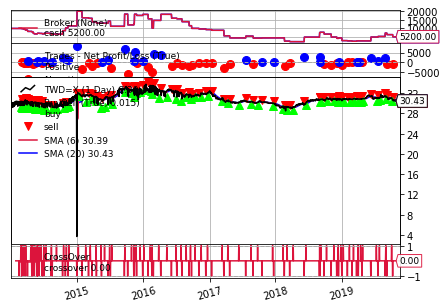

<Figure size 1728x1080 with 0 Axes>

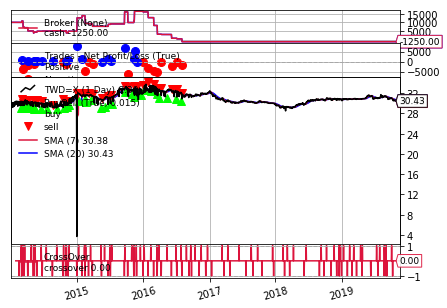

<Figure size 1728x1080 with 0 Axes>

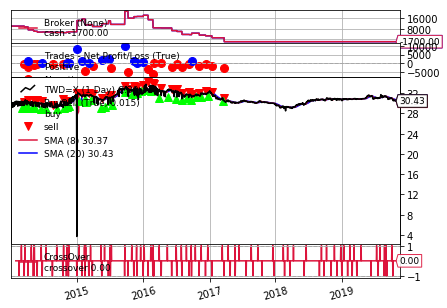

<Figure size 1728x1080 with 0 Axes>

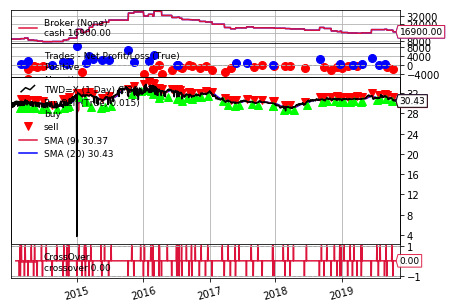

<Figure size 1728x1080 with 0 Axes>

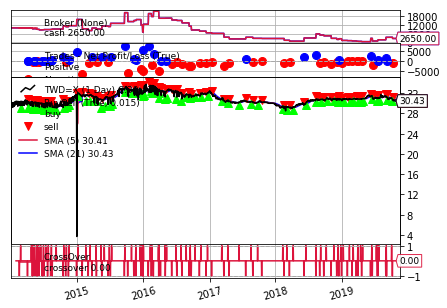

<Figure size 1728x1080 with 0 Axes>

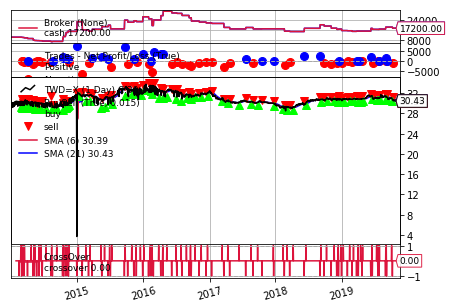

<Figure size 1728x1080 with 0 Axes>

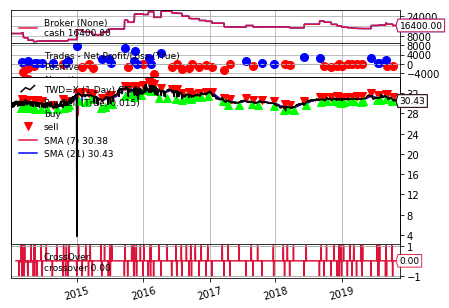

<Figure size 1728x1080 with 0 Axes>

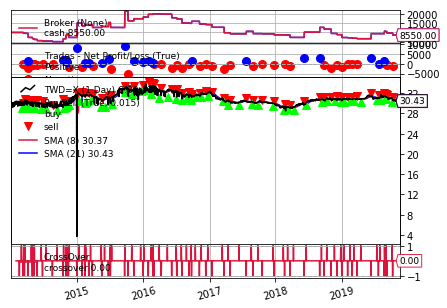

<Figure size 1728x1080 with 0 Axes>

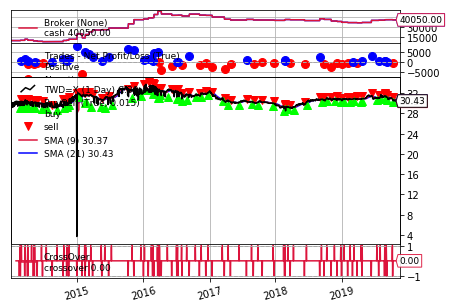

<Figure size 1728x1080 with 0 Axes>

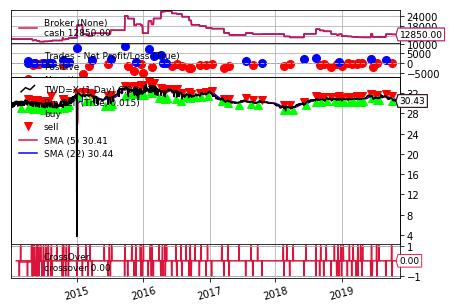

<Figure size 1728x1080 with 0 Axes>

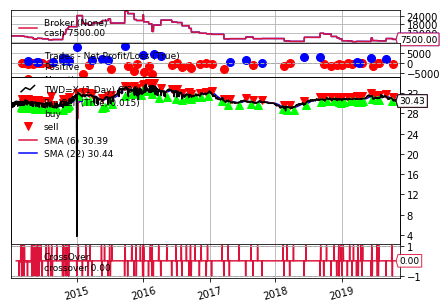

<Figure size 1728x1080 with 0 Axes>

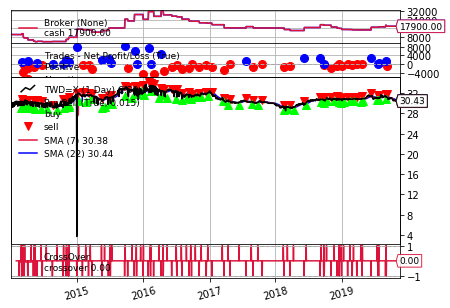

<Figure size 1728x1080 with 0 Axes>

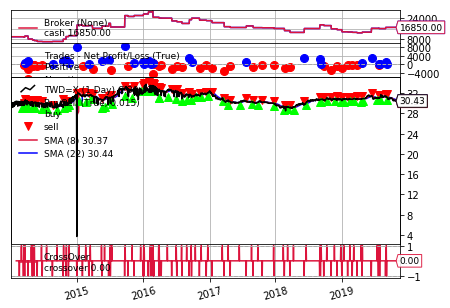

<Figure size 1728x1080 with 0 Axes>

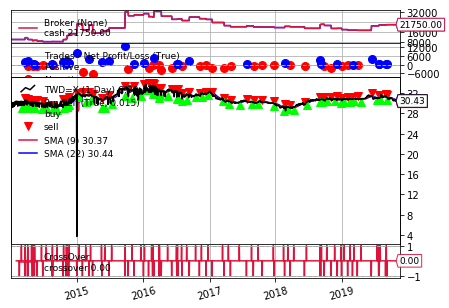

<Figure size 1728x1080 with 0 Axes>

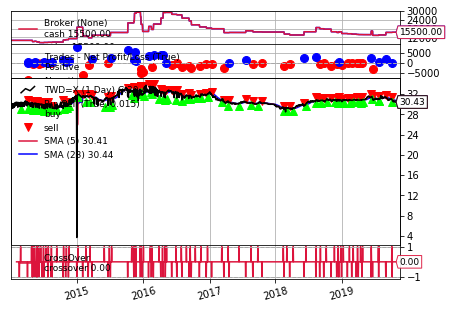

<Figure size 1728x1080 with 0 Axes>

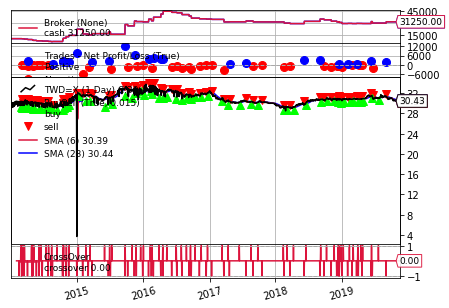

<Figure size 1728x1080 with 0 Axes>

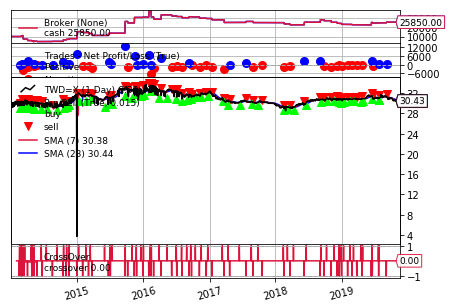

<Figure size 1728x1080 with 0 Axes>

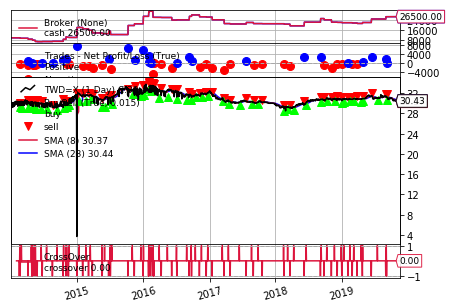

<Figure size 1728x1080 with 0 Axes>

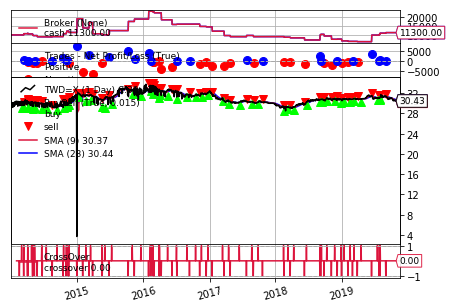

<Figure size 1728x1080 with 0 Axes>

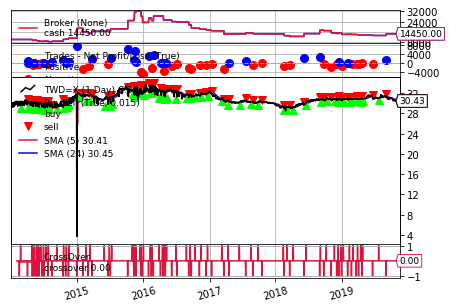

<Figure size 1728x1080 with 0 Axes>

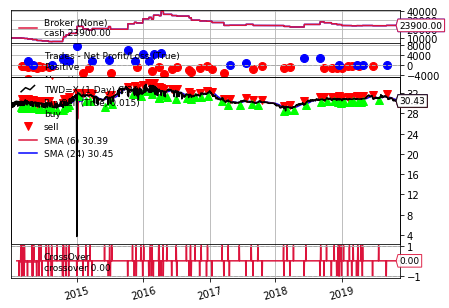

<Figure size 1728x1080 with 0 Axes>

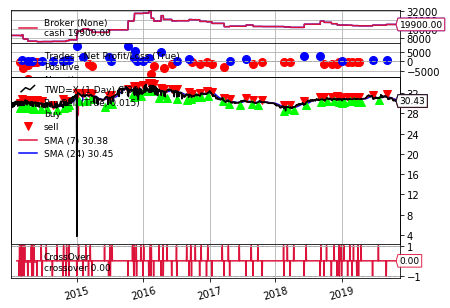

<Figure size 1728x1080 with 0 Axes>

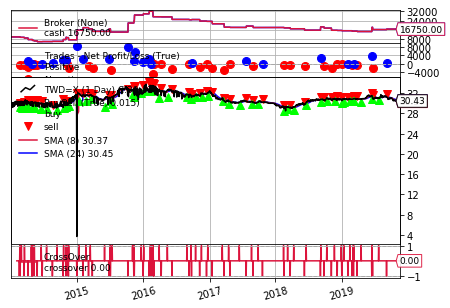

<Figure size 1728x1080 with 0 Axes>

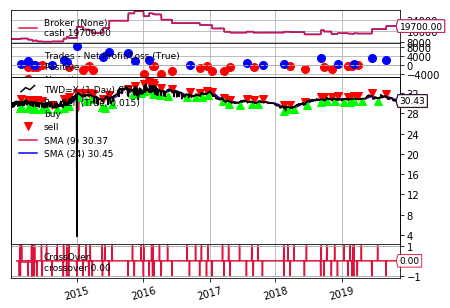

<Figure size 1728x1080 with 0 Axes>

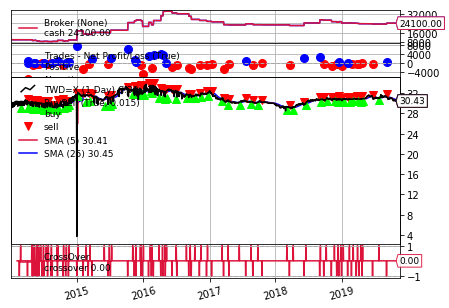

<Figure size 1728x1080 with 0 Axes>

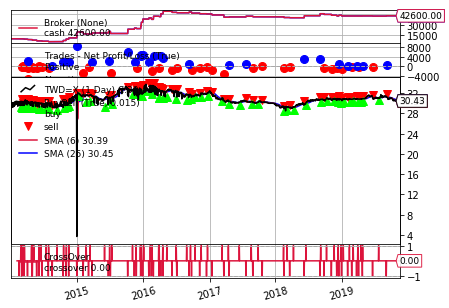

<Figure size 1728x1080 with 0 Axes>

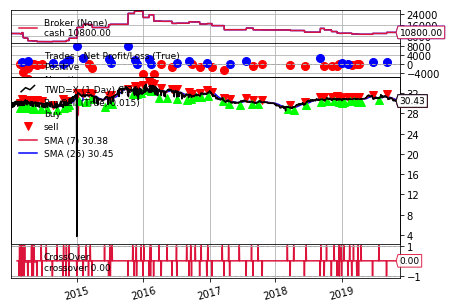

<Figure size 1728x1080 with 0 Axes>

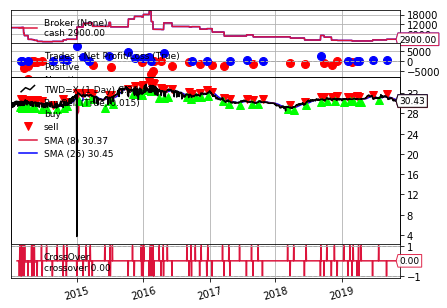

<Figure size 1728x1080 with 0 Axes>

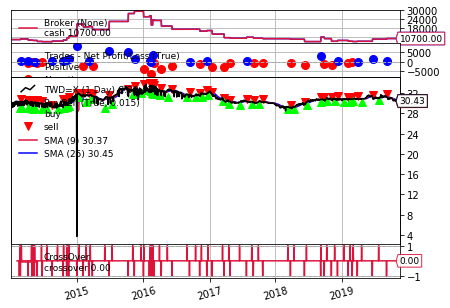

<Figure size 1728x1080 with 0 Axes>

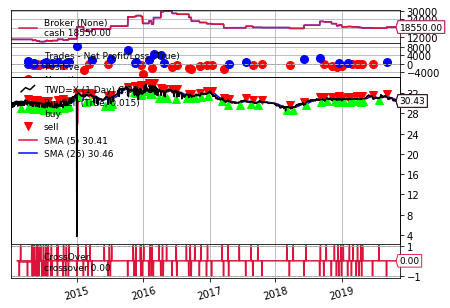

<Figure size 1728x1080 with 0 Axes>

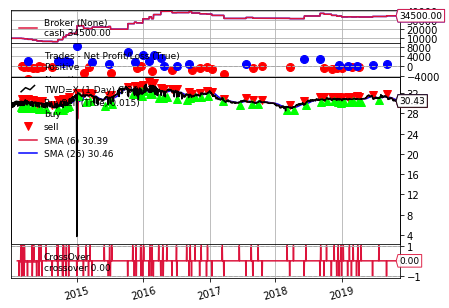

<Figure size 1728x1080 with 0 Axes>

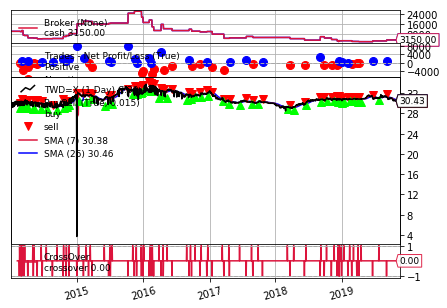

<Figure size 1728x1080 with 0 Axes>

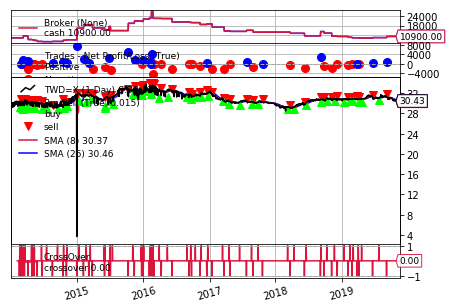

<Figure size 1728x1080 with 0 Axes>

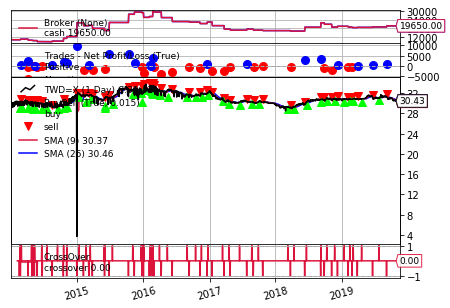

<Figure size 1728x1080 with 0 Axes>

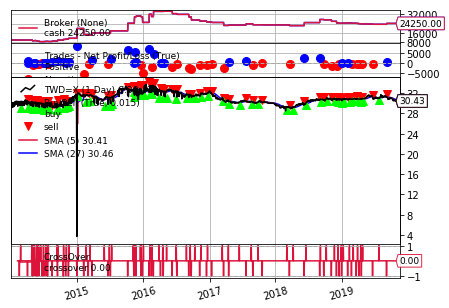

<Figure size 1728x1080 with 0 Axes>

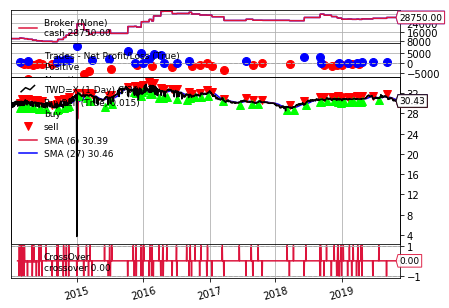

<Figure size 1728x1080 with 0 Axes>

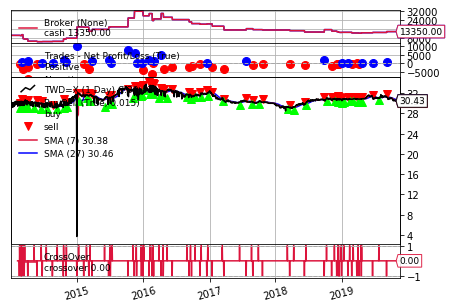

<Figure size 1728x1080 with 0 Axes>

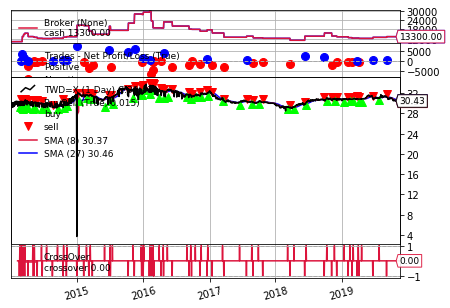

<Figure size 1728x1080 with 0 Axes>

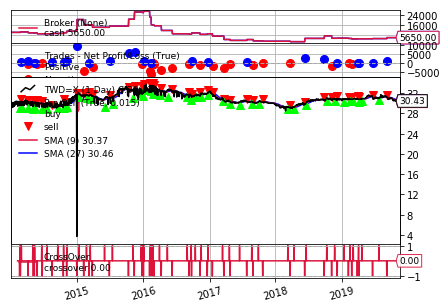

<Figure size 1728x1080 with 0 Axes>

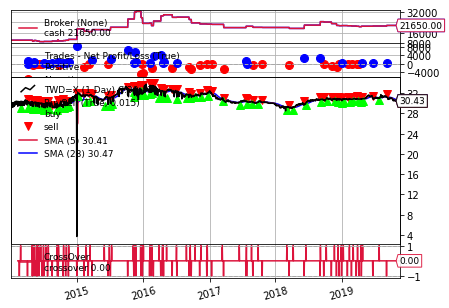

<Figure size 1728x1080 with 0 Axes>

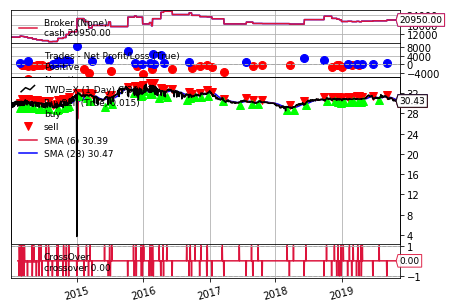

<Figure size 1728x1080 with 0 Axes>

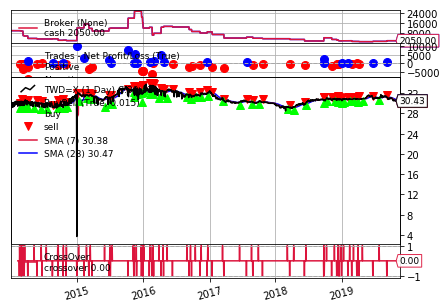

<Figure size 1728x1080 with 0 Axes>

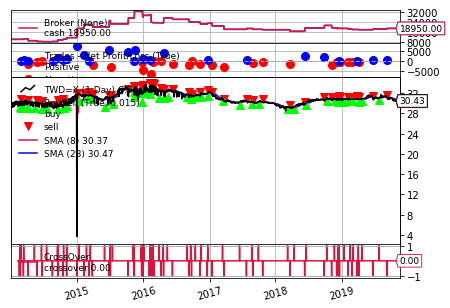

<Figure size 1728x1080 with 0 Axes>

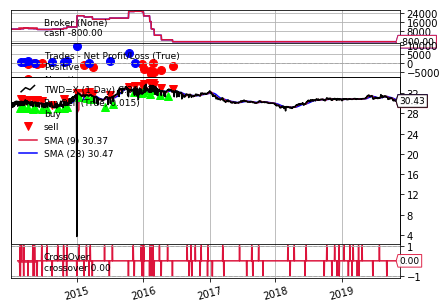

<Figure size 1728x1080 with 0 Axes>

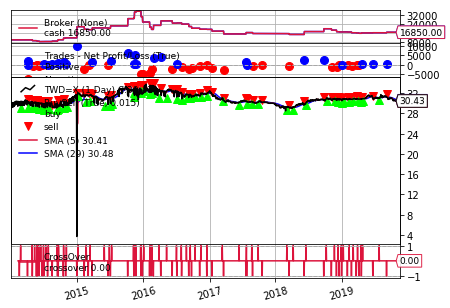

<Figure size 1728x1080 with 0 Axes>

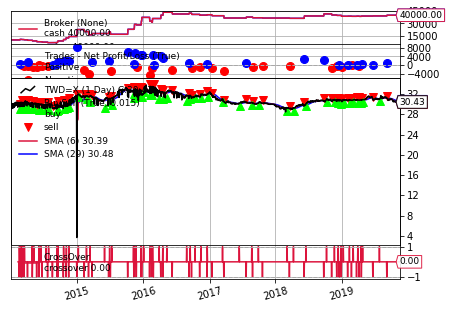

<Figure size 1728x1080 with 0 Axes>

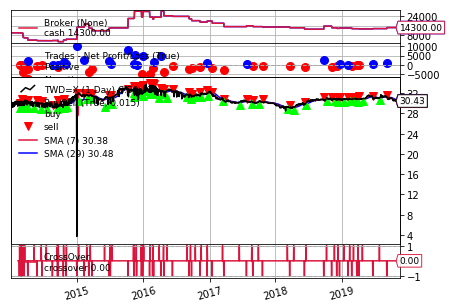

<Figure size 1728x1080 with 0 Axes>

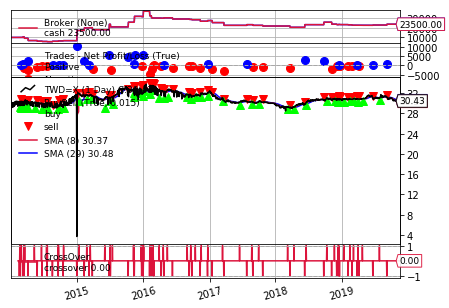

<Figure size 1728x1080 with 0 Axes>

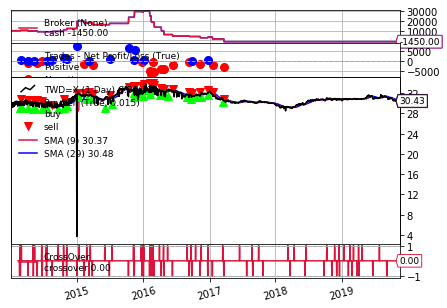

<Figure size 1728x1080 with 0 Axes>

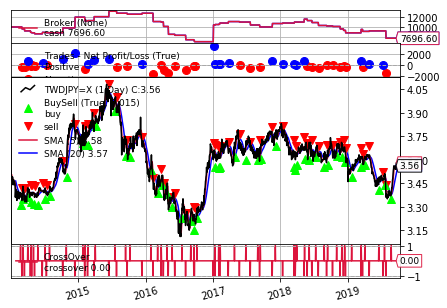

<Figure size 1728x1080 with 0 Axes>

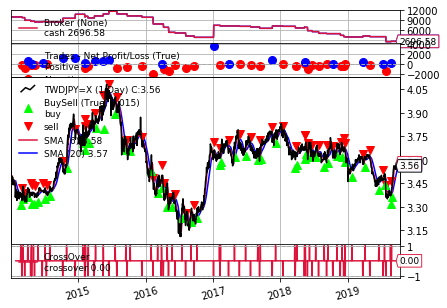

<Figure size 1728x1080 with 0 Axes>

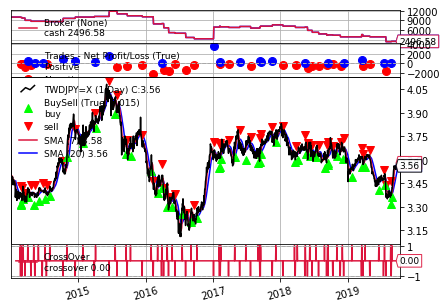

<Figure size 1728x1080 with 0 Axes>

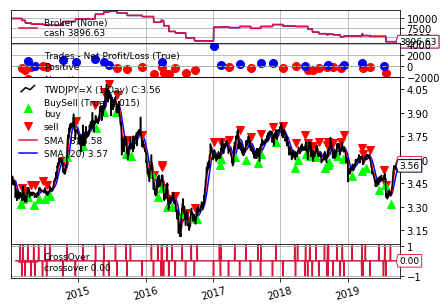

<Figure size 1728x1080 with 0 Axes>

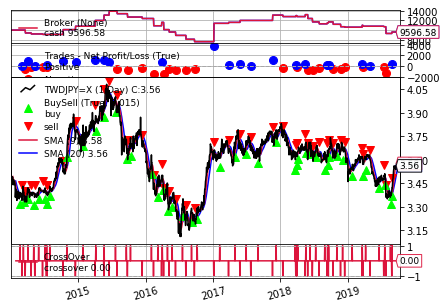

<Figure size 1728x1080 with 0 Axes>

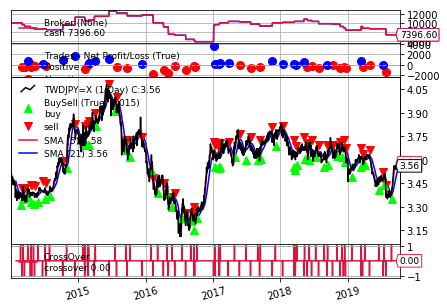

<Figure size 1728x1080 with 0 Axes>

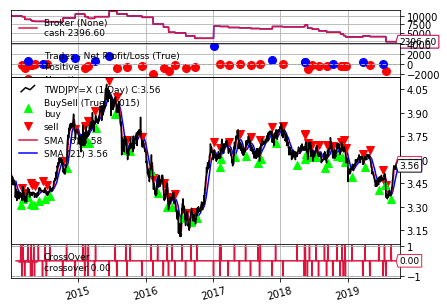

<Figure size 1728x1080 with 0 Axes>

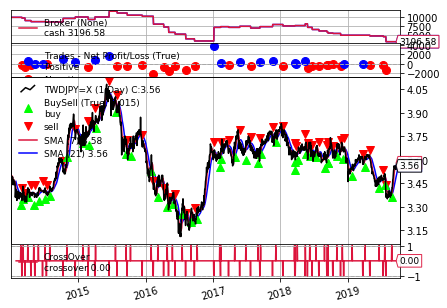

<Figure size 1728x1080 with 0 Axes>

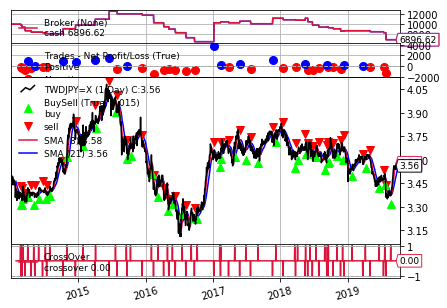

<Figure size 1728x1080 with 0 Axes>

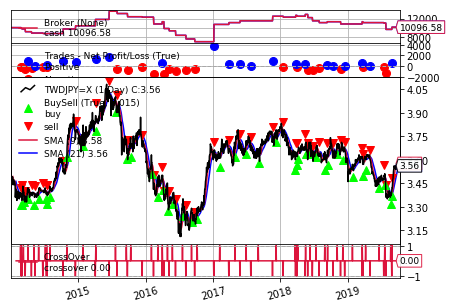

<Figure size 1728x1080 with 0 Axes>

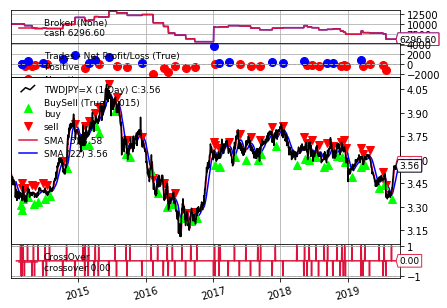

<Figure size 1728x1080 with 0 Axes>

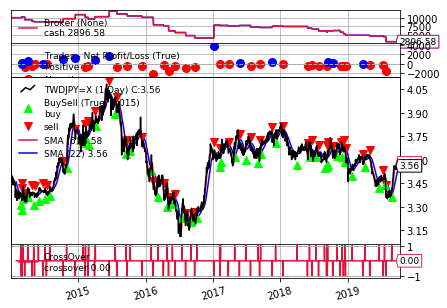

<Figure size 1728x1080 with 0 Axes>

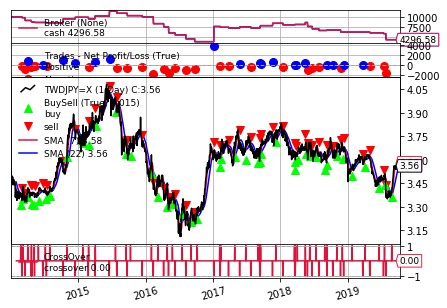

<Figure size 1728x1080 with 0 Axes>

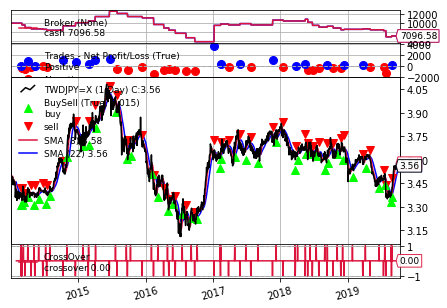

<Figure size 1728x1080 with 0 Axes>

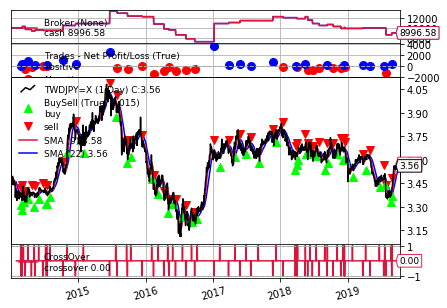

<Figure size 1728x1080 with 0 Axes>

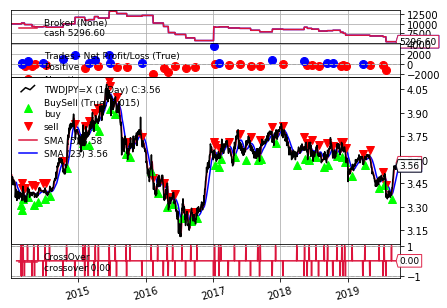

<Figure size 1728x1080 with 0 Axes>

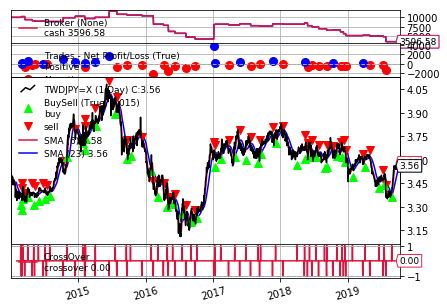

<Figure size 1728x1080 with 0 Axes>

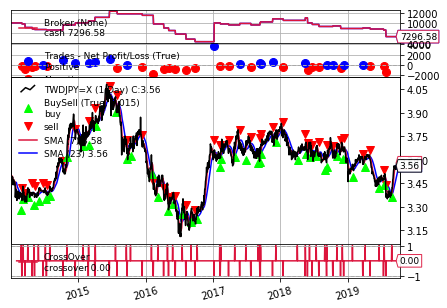

<Figure size 1728x1080 with 0 Axes>

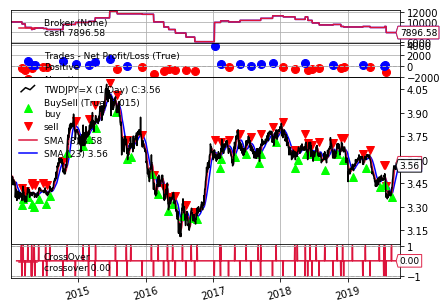

<Figure size 1728x1080 with 0 Axes>

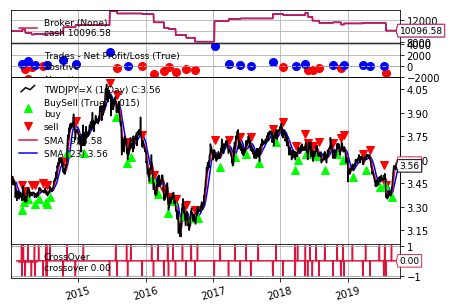

<Figure size 1728x1080 with 0 Axes>

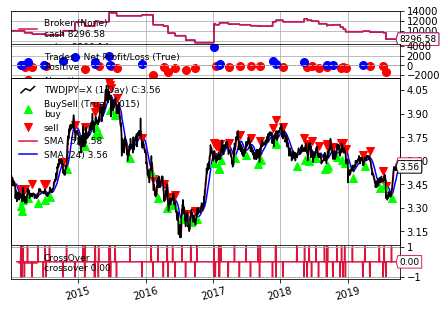

<Figure size 1728x1080 with 0 Axes>

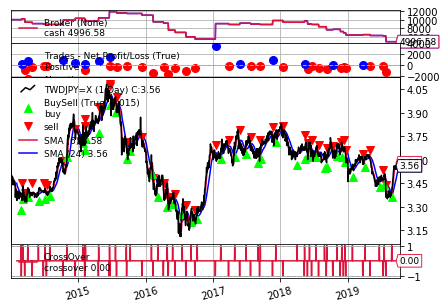

<Figure size 1728x1080 with 0 Axes>

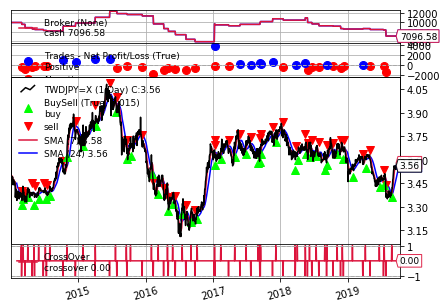

<Figure size 1728x1080 with 0 Axes>

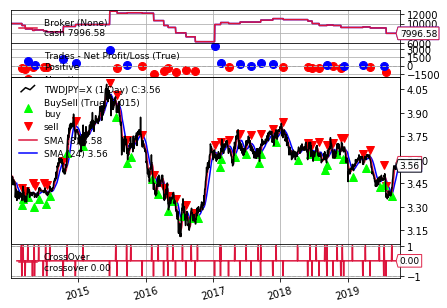

<Figure size 1728x1080 with 0 Axes>

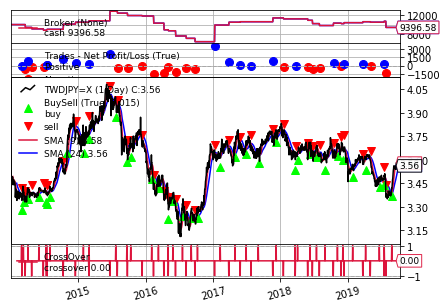

<Figure size 1728x1080 with 0 Axes>

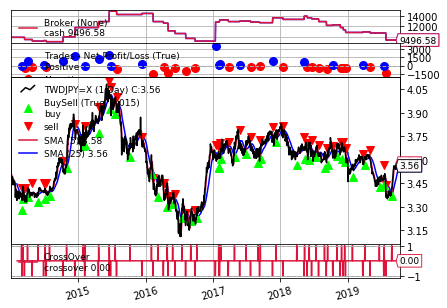

<Figure size 1728x1080 with 0 Axes>

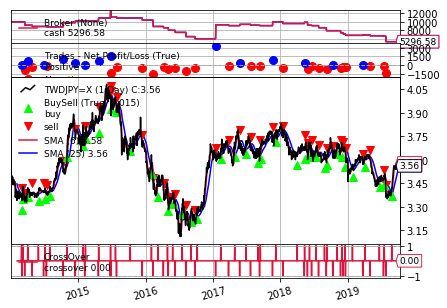

<Figure size 1728x1080 with 0 Axes>

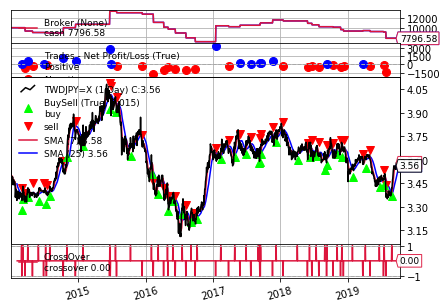

<Figure size 1728x1080 with 0 Axes>

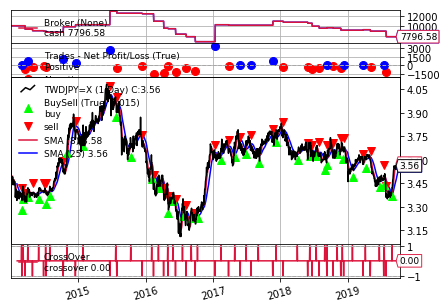

<Figure size 1728x1080 with 0 Axes>

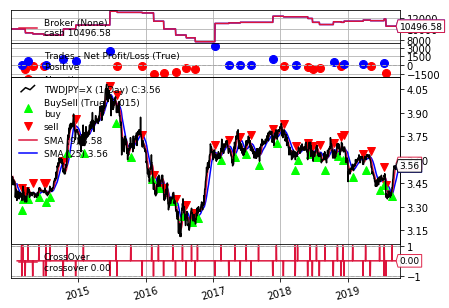

<Figure size 1728x1080 with 0 Axes>

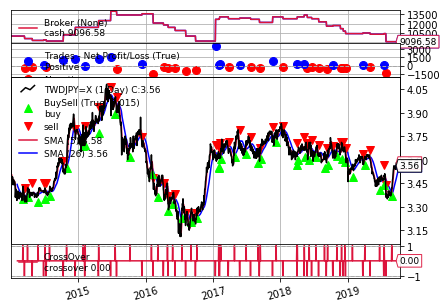

<Figure size 1728x1080 with 0 Axes>

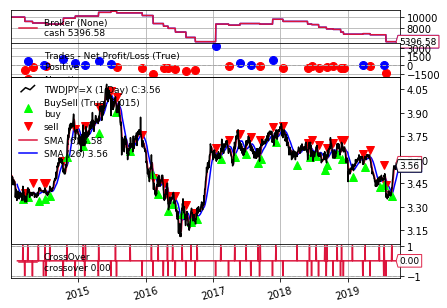

<Figure size 1728x1080 with 0 Axes>

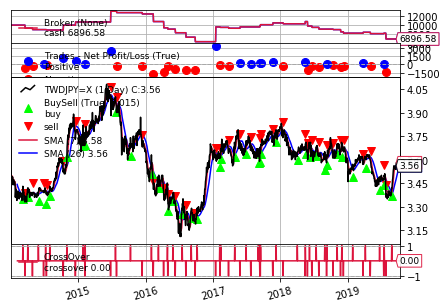

<Figure size 1728x1080 with 0 Axes>

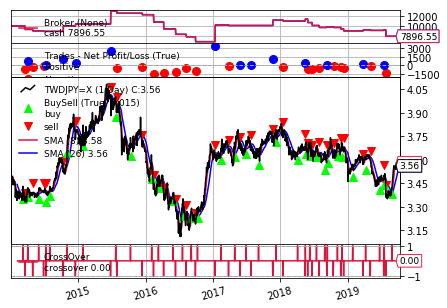

<Figure size 1728x1080 with 0 Axes>

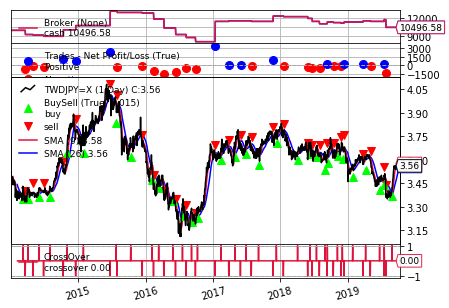

<Figure size 1728x1080 with 0 Axes>

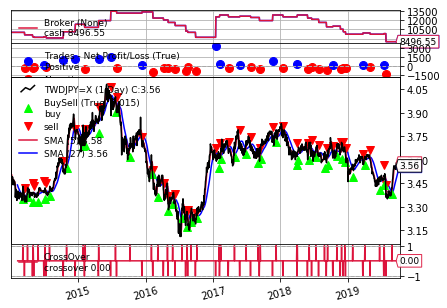

<Figure size 1728x1080 with 0 Axes>

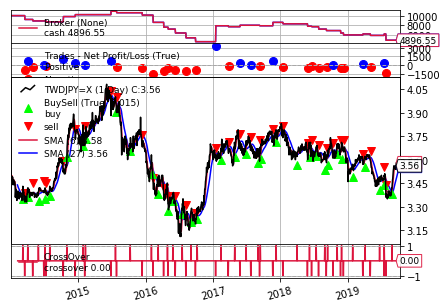

<Figure size 1728x1080 with 0 Axes>

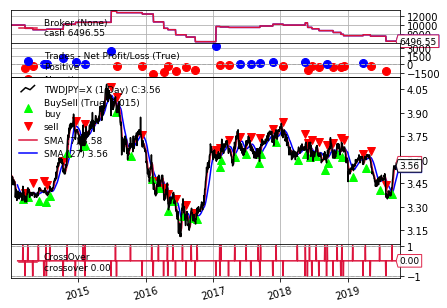

<Figure size 1728x1080 with 0 Axes>

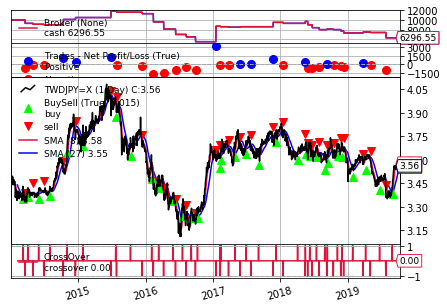

<Figure size 1728x1080 with 0 Axes>

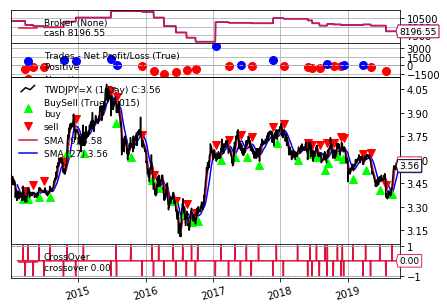

<Figure size 1728x1080 with 0 Axes>

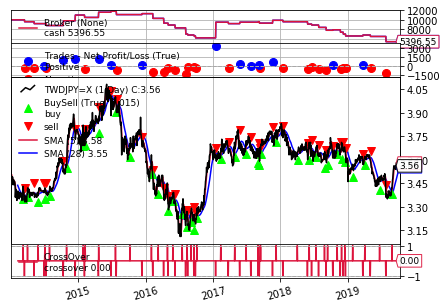

<Figure size 1728x1080 with 0 Axes>

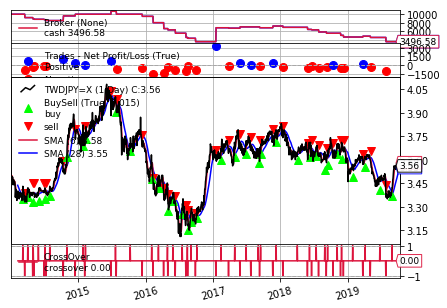

<Figure size 1728x1080 with 0 Axes>

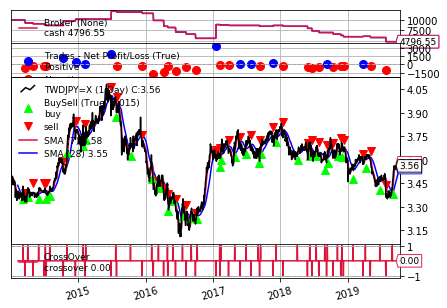

<Figure size 1728x1080 with 0 Axes>

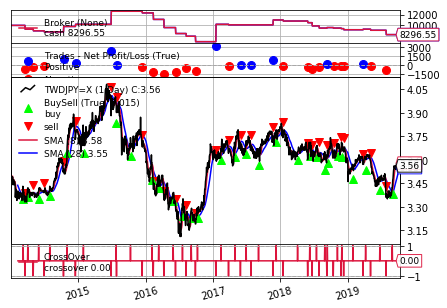

<Figure size 1728x1080 with 0 Axes>

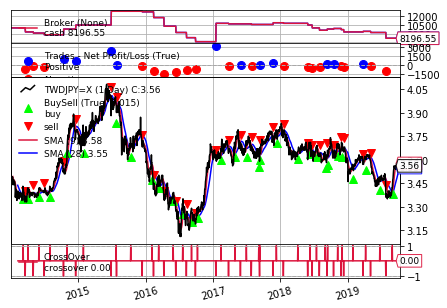

<Figure size 1728x1080 with 0 Axes>

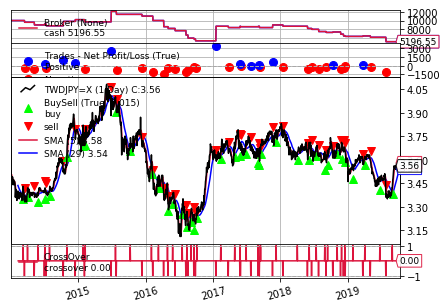

<Figure size 1728x1080 with 0 Axes>

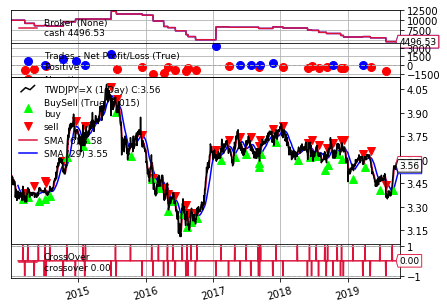

<Figure size 1728x1080 with 0 Axes>

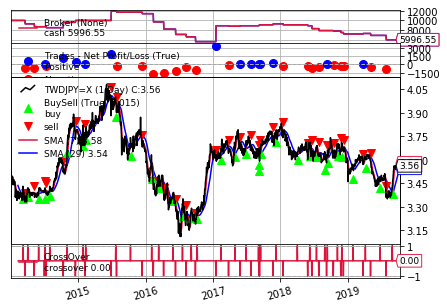

<Figure size 1728x1080 with 0 Axes>

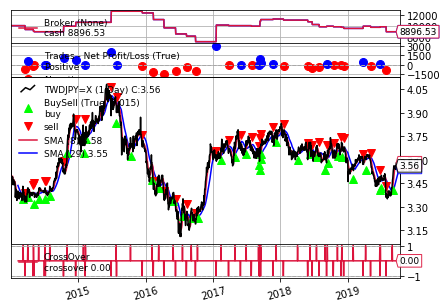

In [ ]:
## Exchange ##
#TWD/USD  #TWD/JPY # 10YearBond #EUR/USD #USD/RMB #BTC-USD
I_Am_Trading_Instance.Function_Batch_MovingAverage(["TWD=X", "TWDJPY=X", "^TNX", "EURUSD=X", "CNH=F","BTC-USD"], [5000,10000, 1000, 100, 1000,10], [5,10], [20,30])

In [ ]:
## CFTC ##
#GOLD #Silver #Crude Oil
I_Am_Trading_Instance.Function_Batch_MovingAverage(["GC=F", "SI=F","OIL"], [300, 1000,20000],[5,10], [20,30])